In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv
from pyspark.sql import SparkSession

In [2]:
data = pd.read_csv("./result.csv")

In [19]:
spark = SparkSession.builder.master('local[*]').getOrCreate()

# df = spark.read.option("multiline","true").json("hdfs://namenode:9000/films-*.csv")
# hdfs_client = InsecureClient('http://localhost:9870', user='root')
# hdfs_files = hdfs_client.list('/')
df = spark.read.csv('hdfs://namenode:9000/films.csv')

print(df.head(10))

In [3]:
data.head(10)

_id/$oid                title  year  \
0  6381970dcdf7fa55cb780e9f        The Godfather  1972   
1  63819720cdf7fa55cb780ea0         Citizen Kane  1941   
2  63819730cdf7fa55cb780ea1          Rear Window  1954   
3  63819754cdf7fa55cb780ea2           Casablanca  1943   
4  63819765cdf7fa55cb780ea3              Boyhood  2014   
5  63819776cdf7fa55cb780ea4    Three Colors: Red  1994   
6  63819788cdf7fa55cb780ea5              Vertigo  1958   
7  638197b2cdf7fa55cb780ea6            Notorious  1946   
8  638197c7cdf7fa55cb780ea7  Singin' in the Rain  1952   
9  638197d3cdf7fa55cb780ea8          City Lights  1931   

                 distributor        release_date  num_of_critic  \
0         Paramount Pictures      March 24, 1972             16   
1         RKO Radio Pictures   September 4, 1941             19   
2         Paramount Pictures   September 1, 1954             18   
3               Warner Bros.    January 23, 1943             18   
4                  IFC Films       July 11, 2014             50   
5                    Miramax   November 23, 1994              9   
6         Paramount Pictures        May 28, 1958             32   
7         RKO Radio Pictures   September 6, 1946             16   
8  Metro-Goldwyn-Mayer (MGM)      April 11, 1952             17   
9             United Artists       March 7, 1931             15   

   critic_positive  critic_mixed  critic_negative  critic_score  ...  \
0               16             0                0           100  ...   
1               19             0                0           100  ...   
2               18             0                0           100  ...   
3               18             0                0           100  ...   
4               50             0                0           100  ...   
5                9             0                0           100  ...   
6               31             1                0           100  ...   
7               16             0                0           100  ...   
8               17             0                0            99  ...   
9               15             0                0            99  ...   

   stars/32 stars/33  stars/34  stars/35  stars/36 stars/37 stars/38 genres/7  \
0       NaN      NaN       NaN       NaN       NaN      NaN      NaN      NaN   
1       NaN      NaN       NaN       NaN       NaN      NaN      NaN      NaN   
2       NaN      NaN       NaN       NaN       NaN      NaN      NaN      NaN   
3       NaN      NaN       NaN       NaN       NaN      NaN      NaN      NaN   
4       NaN      NaN       NaN       NaN       NaN      NaN      NaN      NaN   
5       NaN      NaN       NaN       NaN       NaN      NaN      NaN      NaN   
6       NaN      NaN       NaN       NaN       NaN      NaN      NaN      NaN   
7       NaN      NaN       NaN       NaN       NaN      NaN      NaN      NaN   
8       NaN      NaN       NaN       NaN       NaN      NaN      NaN      NaN   
9       NaN      NaN       NaN       NaN       NaN      NaN      NaN      NaN   

  genres/8 genres/9  
0      NaN      NaN  
1      NaN      NaN  
2      NaN      NaN  
3      NaN      NaN  
4      NaN      NaN  
5      NaN      NaN  
6      NaN      NaN  
7      NaN      NaN  
8      NaN      NaN  
9      NaN      NaN  

[10 rows x 71 columns]

Lấy các cột cần thiết để visualize data

In [4]:
with open("result.csv", "r") as source:
    reader = csv.reader(source)
      
    with open("output.csv", "w") as result:
        writer = csv.writer(result)
        for r in reader:
            
            # Use CSV Index to remove a column from CSV
            #r[3] = r['year']
            writer.writerow((r[1], r[2], r[3], r[4], r[14], r[17], r[18], r[19], r[23]))

In [5]:
output = pd.read_csv("./output.csv")
output.head(10)

title  year                distributor        release_date  \
0        The Godfather  1972         Paramount Pictures      March 24, 1972   
1         Citizen Kane  1941         RKO Radio Pictures   September 4, 1941   
2          Rear Window  1954         Paramount Pictures   September 1, 1954   
3           Casablanca  1943               Warner Bros.    January 23, 1943   
4              Boyhood  2014                  IFC Films       July 11, 2014   
5    Three Colors: Red  1994                    Miramax   November 23, 1994   
6              Vertigo  1958         Paramount Pictures        May 28, 1958   
7            Notorious  1946         RKO Radio Pictures   September 6, 1946   
8  Singin' in the Rain  1952  Metro-Goldwyn-Mayer (MGM)      April 11, 1952   
9          City Lights  1931             United Artists       March 7, 1931   

   rating_score                                            summary  \
0           9.2  Francis Ford Coppola's epic features Marlon Br...   
1           8.4  Following the death of a publishing tycoon, ne...   
2           8.7  A wheelchair-bound photographer spies on his n...   
3           8.8  A Casablanca, Morocco casino owner in 1941 she...   
4           7.4  Filmed over 12 years with the same cast, Richa...   
5           8.5  Krzysztof Kieslowski closes his Three Colors t...   
6           8.6  Vertigo creates a dizzying web of mistaken ide...   
7           7.9  A woman is asked to spy on a group of Nazi fri...   
8           8.7  A silent film production company and cast make...   
9           8.7  The Tramp (Charlie Chaplin) struggles to help ...   

               director genres/0  runtime  
0  Francis Ford Coppola    Drama      175  
1          Orson Welles    Drama      119  
2      Alfred Hitchcock  Mystery      112  
3        Michael Curtiz    Drama      102  
4     Richard Linklater    Drama      165  
5  Krzysztof Kieslowski    Drama       99  
6      Alfred Hitchcock  Mystery      128  
7      Alfred Hitchcock    Drama      101  
8            Gene Kelly   Comedy      103  
9       Charles Chaplin    Drama       87

In [6]:
output.columns

Index(['title', 'year', 'distributor', 'release_date', 'rating_score',
       'summary', 'director', 'genres/0', 'runtime'],
      dtype='object')

In [7]:
output.rename(columns= {"genres/0" : "genres"}, inplace=True)
output.columns

Index(['title', 'year', 'distributor', 'release_date', 'rating_score',
       'summary', 'director', 'genres', 'runtime'],
      dtype='object')

In [8]:
print(len(output.genres.unique()))

22


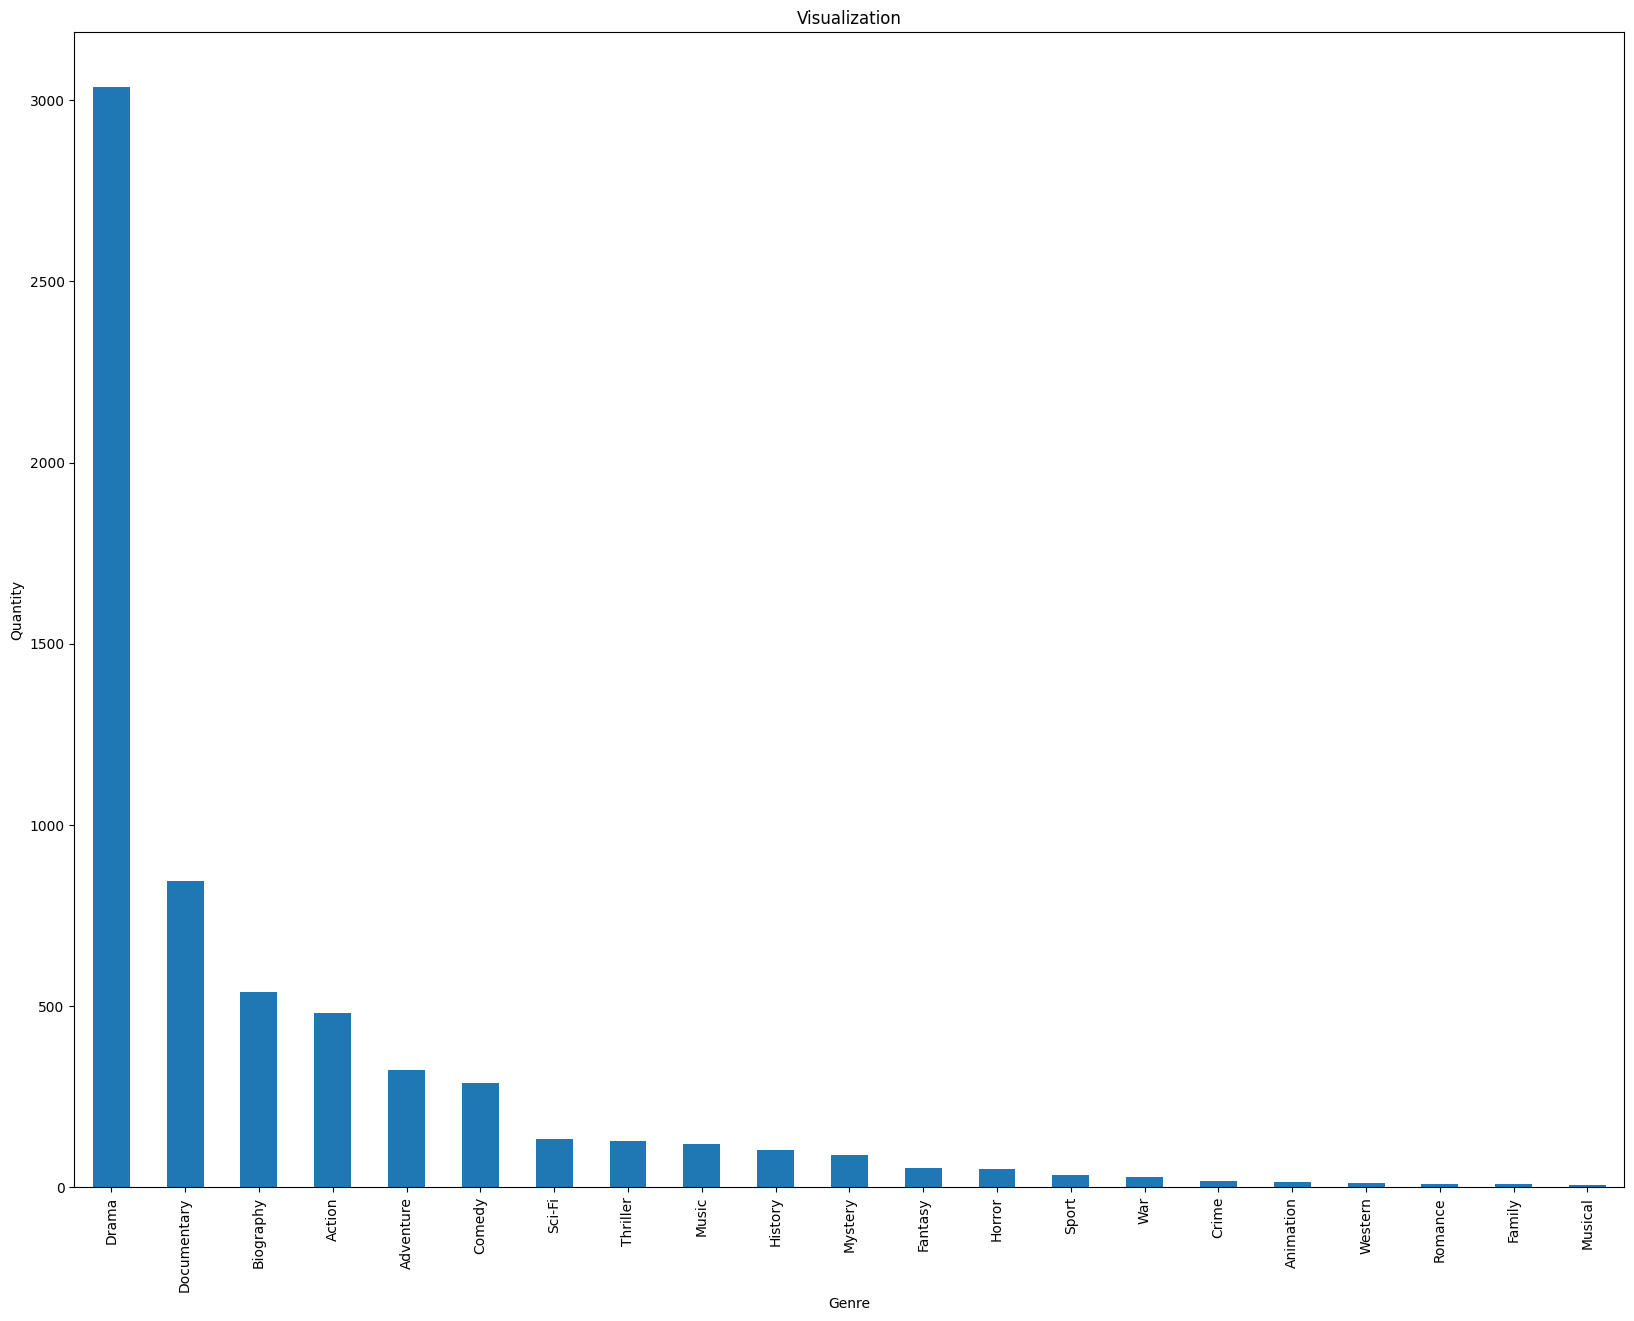

In [9]:
plt.figure(figsize = (20,15))
output.genres.value_counts().plot(kind='bar')
plt.title("Visualization")
plt.xlabel("Genre")
plt.ylabel("Quantity")
plt.xticks(rotation=90)
plt.show()

In [10]:
output.loc[:, ["rating_score", "title"]].iloc[output["rating_score"].sort_values(ascending=False)[:10].index]

rating_score                                              title
0              9.2                                      The Godfather
1762           9.0                                            Memento
1405           9.0                           The Shawshank Redemption
1245           9.0     Star Wars: Episode V - The Empire Strikes Back
166            9.0  The Lord of the Rings: The Fellowship of the Ring
86             9.0                                       Pulp Fiction
5636           9.0                                             Selena
87             9.0                                       Pulp Fiction
238            9.0                             The Godfather: Part II
92             8.9                      Grave of the Fireflies (1988)

In [11]:
runtime_10_film = output.loc[:, ["runtime", "title"]].iloc[output["runtime"].sort_values(ascending=False)[:10].index]

In [12]:
output.loc[:, ["runtime", "title"]].iloc[output["runtime"].sort_values(ascending=False)[:10].index]

runtime                                          title
2442      808                                        La Flor
346       495                                     Dead Souls
106       325                                         Carlos
4438      317                                           1900
2332      295                             Red Riding Trilogy
119       273                            Shoah: Four Sisters
1333      272                            Mysteries of Lisbon
371       272                                      City Hall
3578      260                                      Watergate
310       255  When the Levees Broke: A Requiem in Four Acts

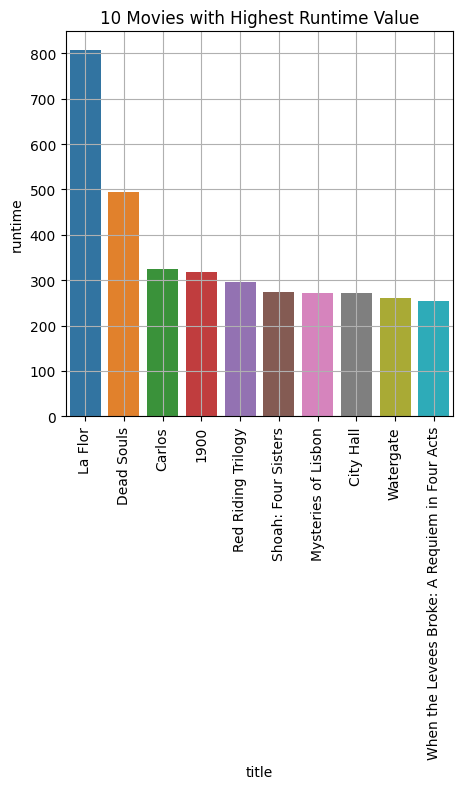

In [13]:
plt.figure(figsize=(5,5))
sns.barplot(x= "title", y= "runtime", data=runtime_10_film)
plt.title("10 Movies with Highest Runtime Value")
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [14]:
rating_10_film = output.loc[:, ["rating_score", "title"]].iloc[output["rating_score"].sort_values(ascending=False)[:10].index]
rating_10_film

rating_score                                              title
0              9.2                                      The Godfather
1762           9.0                                            Memento
1405           9.0                           The Shawshank Redemption
1245           9.0     Star Wars: Episode V - The Empire Strikes Back
166            9.0  The Lord of the Rings: The Fellowship of the Ring
86             9.0                                       Pulp Fiction
5636           9.0                                             Selena
87             9.0                                       Pulp Fiction
238            9.0                             The Godfather: Part II
92             8.9                      Grave of the Fireflies (1988)

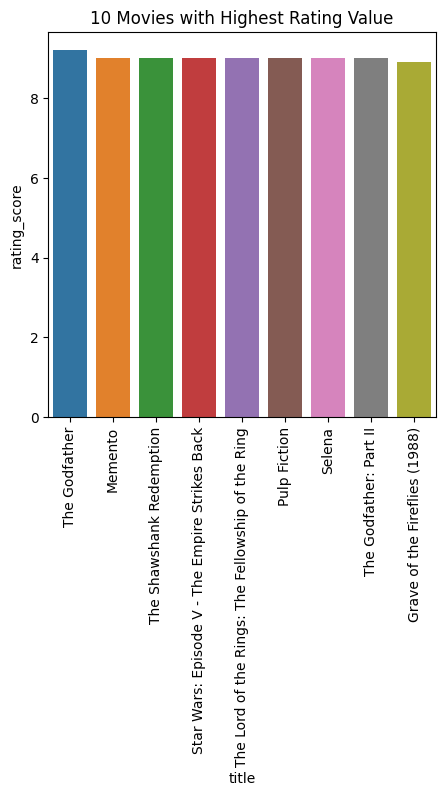

In [15]:
plt.figure(figsize=(5,5))
sns.barplot(x= "title", y= "rating_score", data=rating_10_film)
plt.title("10 Movies with Highest Rating Value")
plt.xticks(rotation=90)
plt.show()

In [16]:
yearfilter = output.query(' 2023> year > 2010')

years_runtime = yearfilter[["year", "runtime"]].groupby("year").sum()


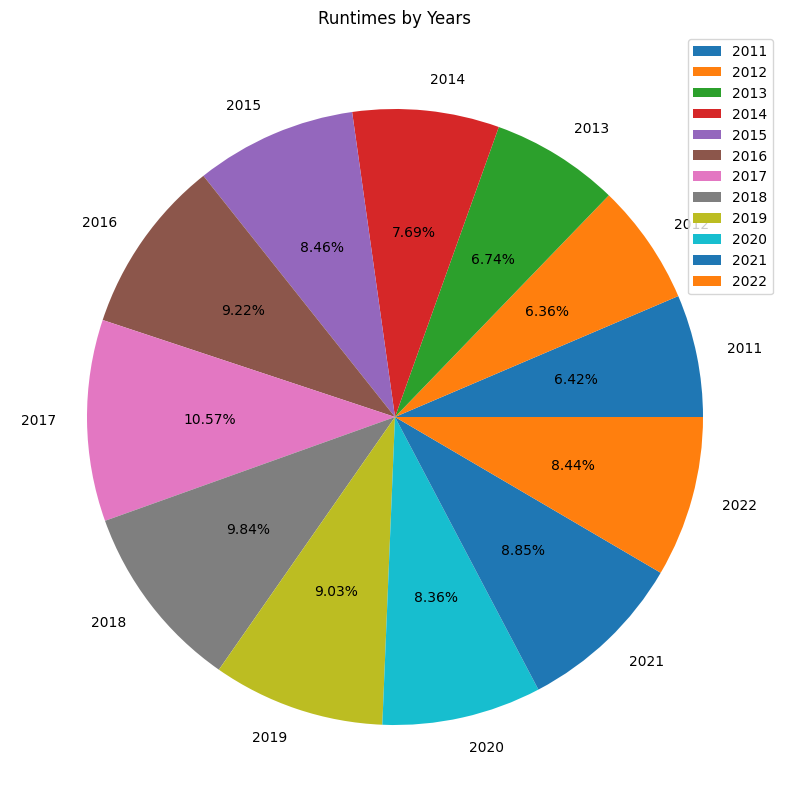

In [17]:
plt.figure(figsize=(10,10))
plt.pie(years_runtime["runtime"], autopct="%.2f%%", labels=years_runtime.index)
plt.legend()
plt.title("Runtimes by Years")
plt.show()

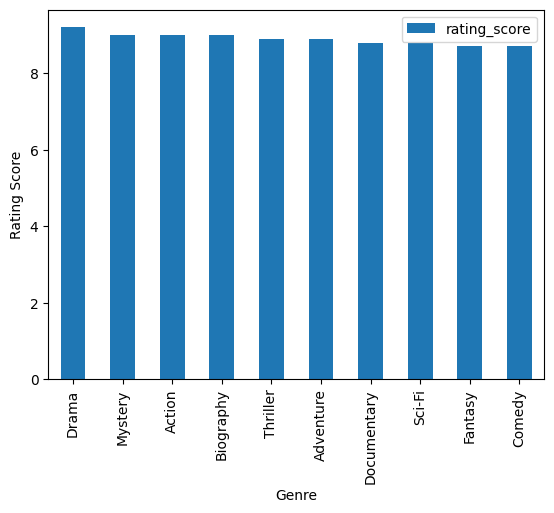

In [19]:
output[['genres', 'rating_score']].sort_values('rating_score', ascending=False).drop_duplicates('genres').head(10).plot(x='genres', y='rating_score', kind='bar')
plt.xlabel('Genre')
plt.ylabel('Rating Score')
plt.show(block=True) #lay ra gia tri dau tien cua tung genres de truc quan hoa